# Script XA DSA
This notebook imports necessary libraries and data from Excel files to work with ...

In [1]:
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'C:\\' # 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'


# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\IDS7\\2024\\"
df_ids7 = bh_utils.import_excel_files_to_dataframe(root_folder)

# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\DoseTrack - Serienivå\\2024\\"
df_dt = bh_utils.import_excel_files_to_dataframe(root_folder)

Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-01 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-02 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-03 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-04 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-05 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-06 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-07 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-08 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-09 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-10 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-11 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2024\2024-12 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\DoseTrack - Serienivå\2024\2024-01 - OUS.xlsx...
Reading C:\Users\bjor

In [2]:
# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)

Dropping unnecessary column: Prioritet- og lesemerkeikon
Dropping unnecessary column: Lagt til i demonstrasjon-ikon
Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 1530
Number of cancelled procedures: 295
Number of non-human subjects: 101
Number of rows with invalid accession number: 7
2211     NNRA000009433721
11806    NNRA000009532398
11807    NNRA000009578608
18065    NNUL000009507772
18066    NNUL000009507772
18067    NNUL000009612281
27994    NBOU000012935221
Name: Henvisnings-ID, dtype: object
Number of accession numbers in IDS7: 21339
Number of accession numbers in IDS7 not in DoseTrack: 6475
Without this column, we cannot keep track of which procedures are on the same patient.


User Guide to get the "Pasienter" column in the IDS7 data:


Note that the "Pasient column is not a column in IDS7, but must be created manually for anonymity reasons.
This can be done in excel after export to a safe location using the following met

In [4]:
# Print all unique elements in Modality Room, sorted alphabetically:
print("Unique elements in Modality Room:")
print(sorted(data['Modality Room'].unique()))

Unique elements in Modality Room:
['IRH_XA6', 'IRH_XA7', 'KRH_Elfys1', 'KRH_Elfys2', 'KRH_Elfys3', 'KRH_Elfys4', 'KRH_LAB39', 'KRH_Lab13', 'KRH_XA3', 'KRH_XA6', 'KRH_XA7', 'KRH_XA8', 'RAK_XA1', 'RRA_XA1', 'RRH_RF1', 'RRH_RF2', 'RRH_XA1', 'RRH_XA2', 'RRH_XA4', 'RRH_XA5', 'RUL_RF1', 'RUL_RF2', 'RUL_RF3', 'RUL_XA3', 'RUL_XA5', 'RUL_XA6', 'RUL_XA7(Stue 15)']


In [3]:
import mapping_dict_rad_xa as rad_dict
# Representative doser for radiologisk Rikshospital
data = data[data['Modality Room'].isin(['IRH_XA7', 'RAK_XA1', 'RRA_XA1', 'RRH_RF1', 'RRH_RF2', 'RRH_XA1', 'RRH_XA2', 'RRH_XA4', 'RUL_RF1', 'RUL_RF2', 'RUL_RF3', 'RUL_XA3', 'RUL_XA5', 'RUL_XA6', 'RUL_XA7(Stue 15)'])]
import importlib
importlib.reload(rad_dict)


# Get the mapping dictionary:
mapping_dict = rad_dict.get_rad_xa_mapping_dict()
data = bh_map.map_procedures(data, mapping_dict, True)


Mapping procedures...

Caput Embolisering -> Caput Embolisering
Caput Trombektomi & ~Caput Embolisering -> Trombektomi
Caput og collum & ~Caput Embolisering & ~Caput Trombektomi -> Caput og collum
Myelografi -> Myelografi
RG Columna - Vertebroplastikk (int.) -> Vertebroplastikk
RG Columna & ~Myelografi & ~Caput & ~Vertebroplastikk  -> RG Columna eks. Myelografi og vertebroplastikk
Cervical Nerverotsinjeksjon -> Cervical Nerverotsinjeksjon
WARNING! No procedures were targeted by this mapping!


RG Tinningben -> Cochlia
RG Scoliose -> Scoliose
RG Shuntveier -> Shuntveier/Shuntventil
RG Shuntventil -> Shuntveier/Shuntventil
Diafragmabevegelse -> Diafragmabevegelse
Hysterosalpingografi -> HSG
Øsofagus -> Øsofagus/ØVD, enkelt og dobbelt
Øsophagus -> Øsofagus/ØVD, enkelt og dobbelt
WARNING! No procedures were targeted by this mapping!


RG ØVD -> Øsofagus/ØVD, enkelt og dobbelt
RG Nedleggelse av ventrikkelsonde & ~ØVD -> Nedleggelse av ventrikkelsonde
Urethragrafi -> Urethragrafi/Urografi/Ur

Reporting doses for Caput Embolisering:


Alle: n =  108, DAP: Median - 108.3, 95% CI: [94.4 - 127.8] IQR [76.2 - 182.3], Range (30.4 - 820.5).


RRH_XA2: n =  107, DAP: Median - 108.2 (Gy*cm2), 95% CI: [94.18 - 128.14] IQR [76.11 - 184.27], Range (30.44 - 820.48).
RRH_XA4: n =    1, DAP: Median - 111.33 (Gy*cm2), 95% CI: [111.33 - 111.33] IQR [111.33 - 111.33], Range (111.33 - 111.33).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


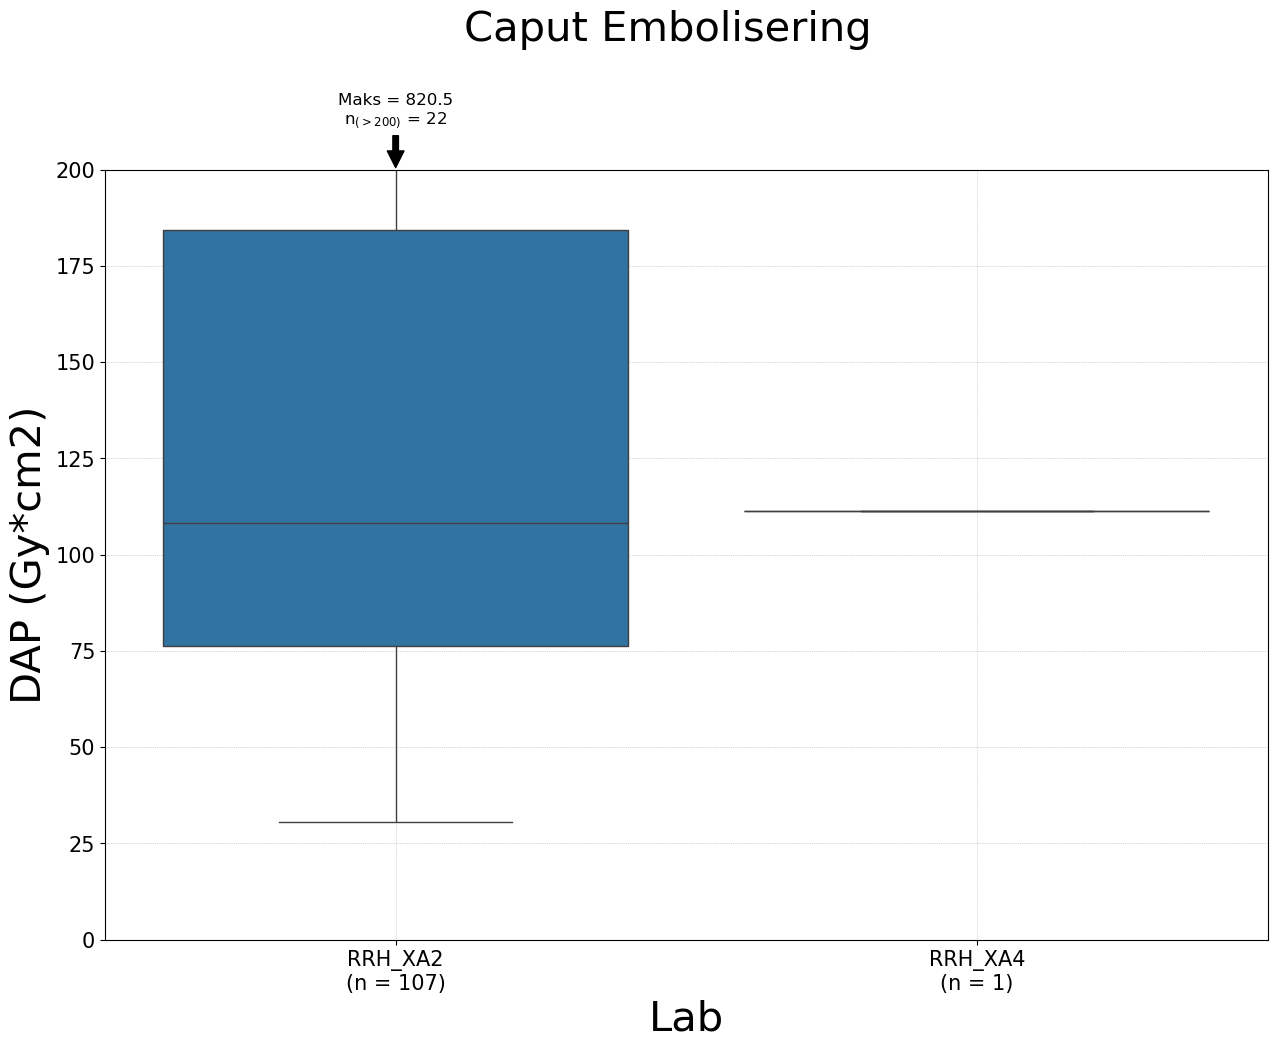

In [5]:
procedure = 'Caput Embolisering'
export = False
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for Trombektomi:


Alle: n =  203, DAP: Median - 81.3, 95% CI: [76.5 - 89.7] IQR [57.8 - 125.8], Range (21.3 - 611.0).


RRH_XA2: n =  132, DAP: Median - 75.77 (Gy*cm2), 95% CI: [67.39 - 83.74] IQR [55.96 - 114.94], Range (21.26 - 609.62).
RRH_XA4: n =   17, DAP: Median - 152.98 (Gy*cm2), 95% CI: [111.12 - 220.05] IQR [111.12 - 220.05], Range (26.02 - 610.98).
RUL_XA5: n =   54, DAP: Median - 93.2 (Gy*cm2), 95% CI: [79.47 - 107.01] IQR [60.27 - 124.81], Range (29.32 - 523.21).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


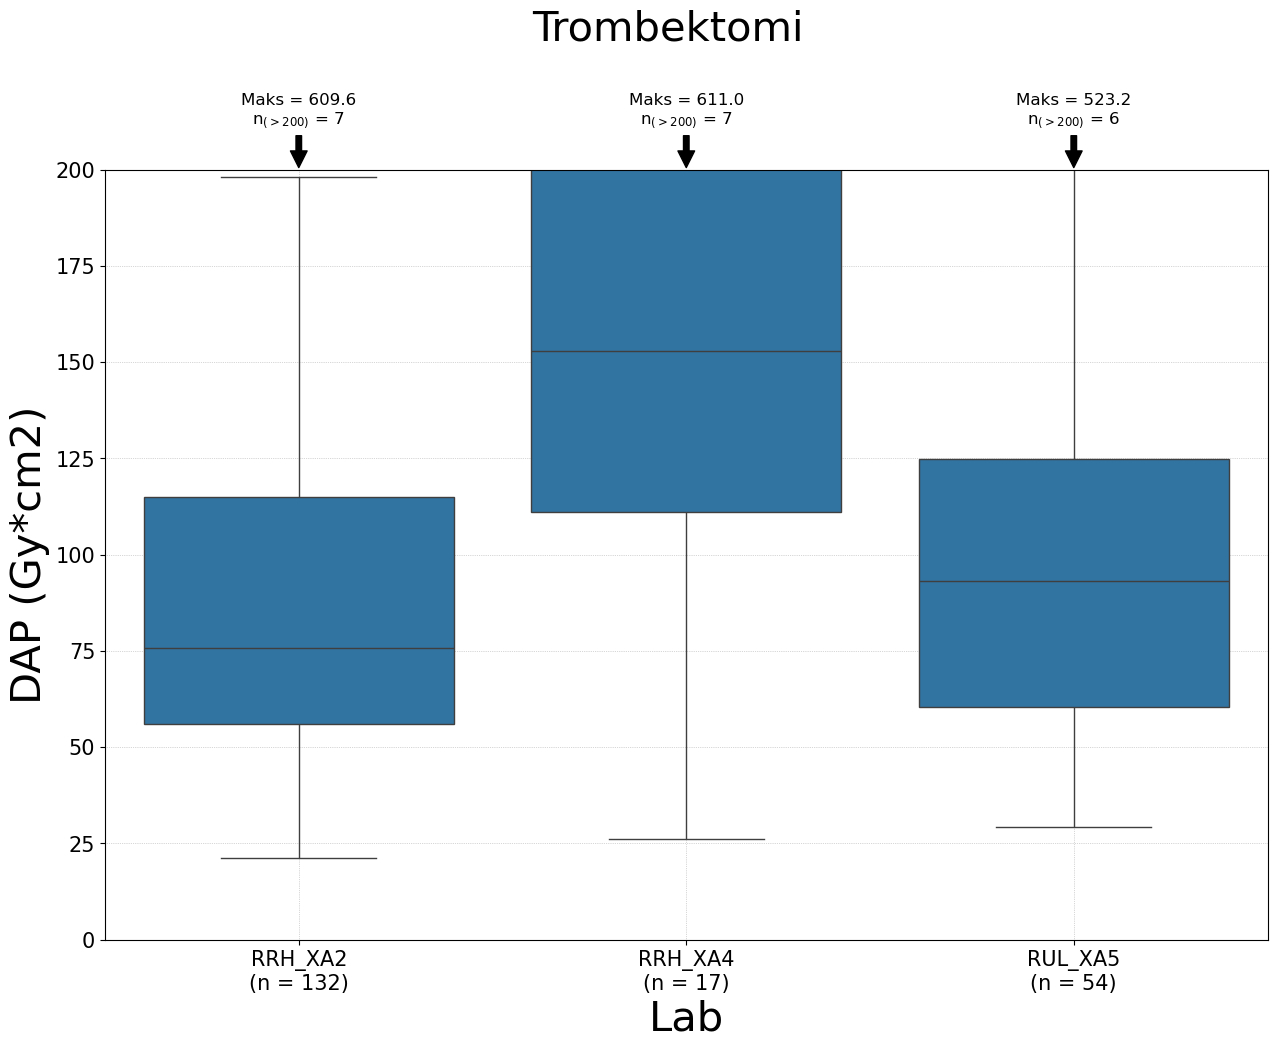

In [28]:
procedure = 'Trombektomi'
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for Caput og collum:


Alle: n =   87, DAP: Median - 59.2, 95% CI: [51.92 - 73.89] IQR [42.1 - 109.7], Range (7.2 - 358.5).


RRH_XA2: n =   71, DAP: Median - 54.42 (Gy*cm2), 95% CI: [44.82 - 65.82] IQR [36.44 - 86.12], Range (7.18 - 358.53).
RRH_XA4: n =   15, DAP: Median - 129.24 (Gy*cm2), 95% CI: [84.43 - 160.3] IQR [79.16 - 161.59], Range (22.78 - 299.71).
RUL_XA5: n =    1, DAP: Median - 64.86 (Gy*cm2), 95% CI: [64.86 - 64.86] IQR [64.86 - 64.86], Range (64.86 - 64.86).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


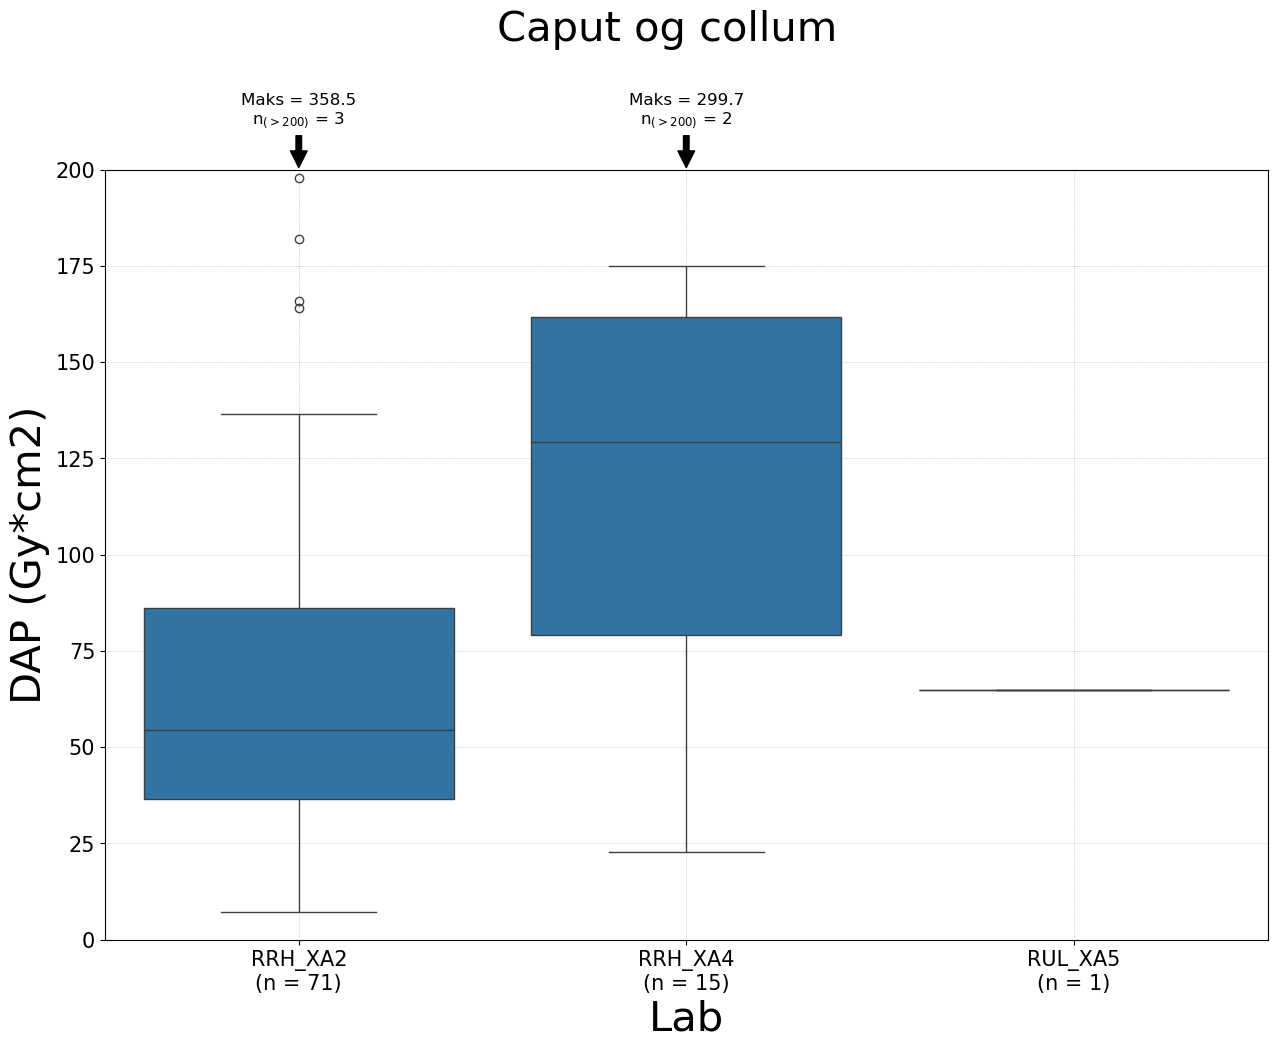

In [29]:
procedure = 'Caput og collum'
bh_plot.plot_representative_dose(data, procedure, 200, export)

Reporting doses for Myelografi:


Alle: n =   67, DAP: Median - 19.8, 95% CI: [12.26 - 40.88] IQR [4.8 - 79.3], Range (0.5 - 485.9).


RRH_XA2: n =   32, DAP: Median - 70.68 (Gy*cm2), 95% CI: [45.93 - 116.45] IQR [40.58 - 153.24], Range (14.34 - 485.9).
RRH_XA4: n =    2, DAP: Median - 130.74 (Gy*cm2), 95% CI: [88.23 - 173.24] IQR [109.49 - 151.99], Range (88.23 - 173.24).
RUL_XA5: n =   33, DAP: Median - 4.54 (Gy*cm2), 95% CI: [3.89 - 8.75] IQR [3.64 - 12.05], Range (0.52 - 36.7).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


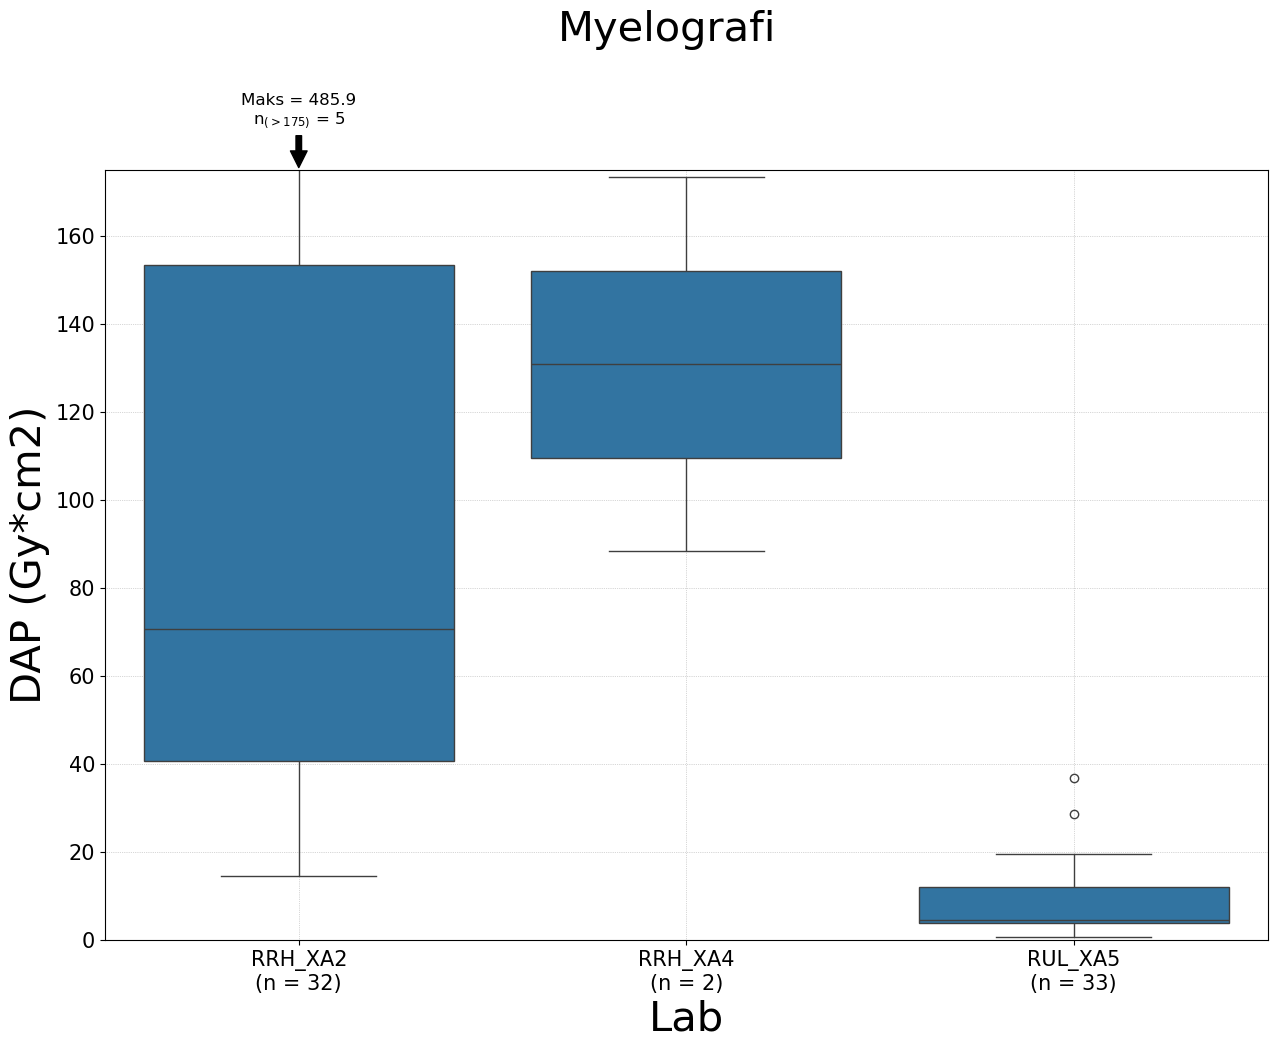

In [31]:
procedure = 'Myelografi'
bh_plot.plot_representative_dose(data, procedure, 175, export)

Reporting doses for Vertebroplastikk:


Alle: n =   17, DAP: Median - 49.2, 95% CI: [33.95 - 94.98] IQR [34.0 - 95.0], Range (24.8 - 219.4).


RUL_XA5: n =   17, DAP: Median - 49.23 (Gy*cm2), 95% CI: [33.95 - 94.98] IQR [33.95 - 94.98], Range (24.79 - 219.38).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


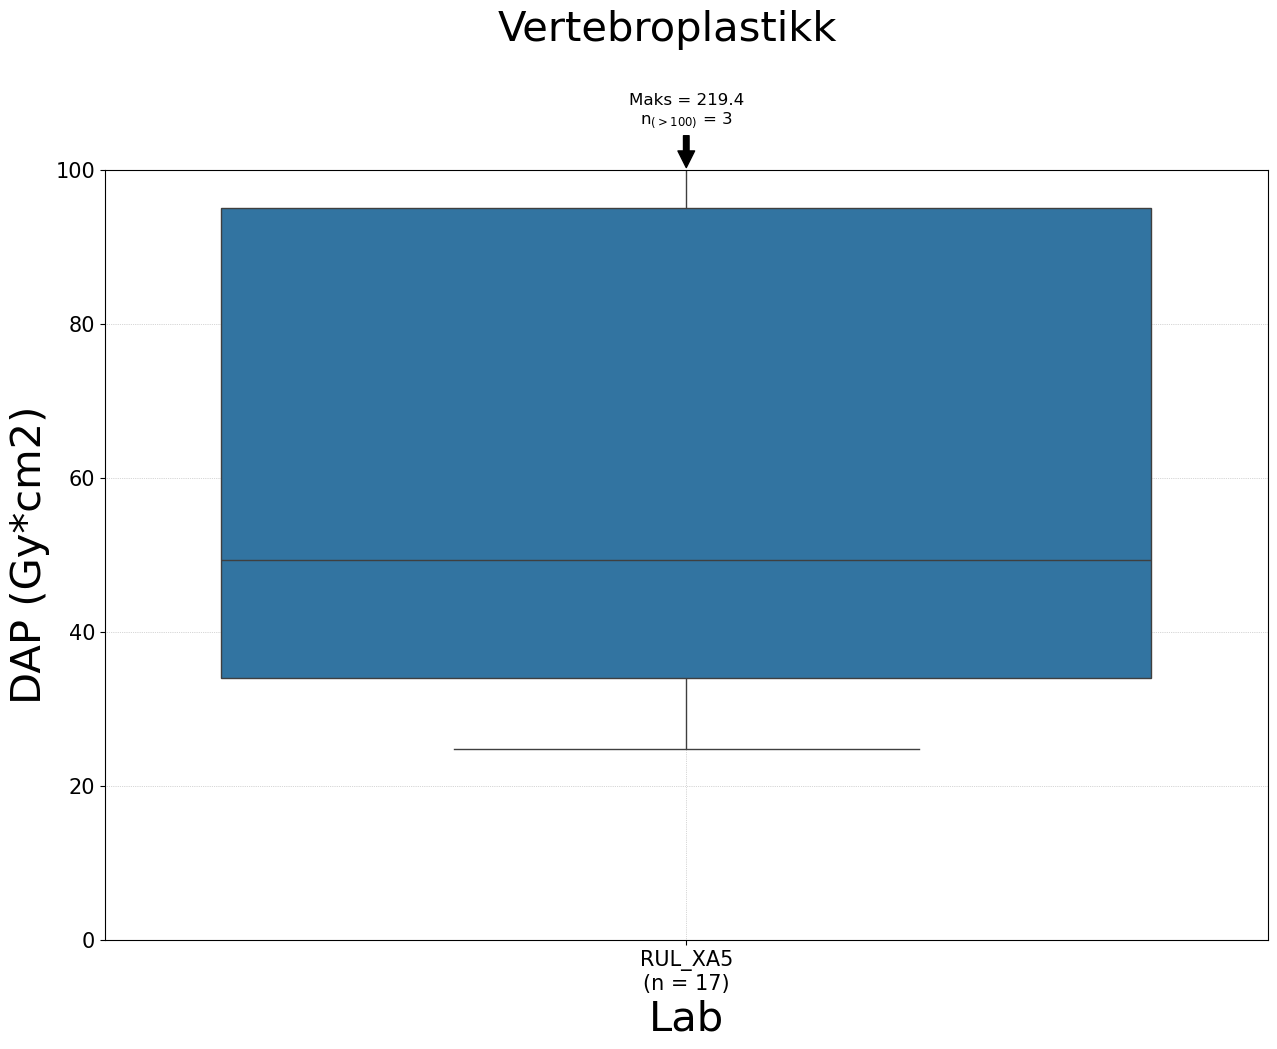

In [32]:
procedure = 'Vertebroplastikk'
bh_plot.plot_representative_dose(data, procedure, 100, export)

Reporting doses for RG Columna eks. Myelografi og vertebroplastikk:


Alle: n =  700, DAP: Median - 3.8, 95% CI: [3.31 - 4.11] IQR [1.7 - 9.3], Range (0.2 - 804.0).


RRH_XA2: n =   80, DAP: Median - 6.66 (Gy*cm2), 95% CI: [3.79 - 10.16] IQR [2.46 - 15.86], Range (0.52 - 156.82).
RRH_XA4: n =   50, DAP: Median - 12.08 (Gy*cm2), 95% CI: [7.27 - 16.16] IQR [5.01 - 28.34], Range (0.61 - 804.04).
RUL_RF2: n =    1, DAP: Median - 0.16 (Gy*cm2), 95% CI: [0.16 - 0.16] IQR [0.16 - 0.16], Range (0.16 - 0.16).
RUL_XA3: n =    1, DAP: Median - 1.93 (Gy*cm2), 95% CI: [1.93 - 1.93] IQR [1.93 - 1.93], Range (1.93 - 1.93).
RUL_XA5: n =  568, DAP: Median - 3.27 (Gy*cm2), 95% CI: [2.86 - 3.74] IQR [1.6 - 7.47], Range (0.16 - 100.93).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


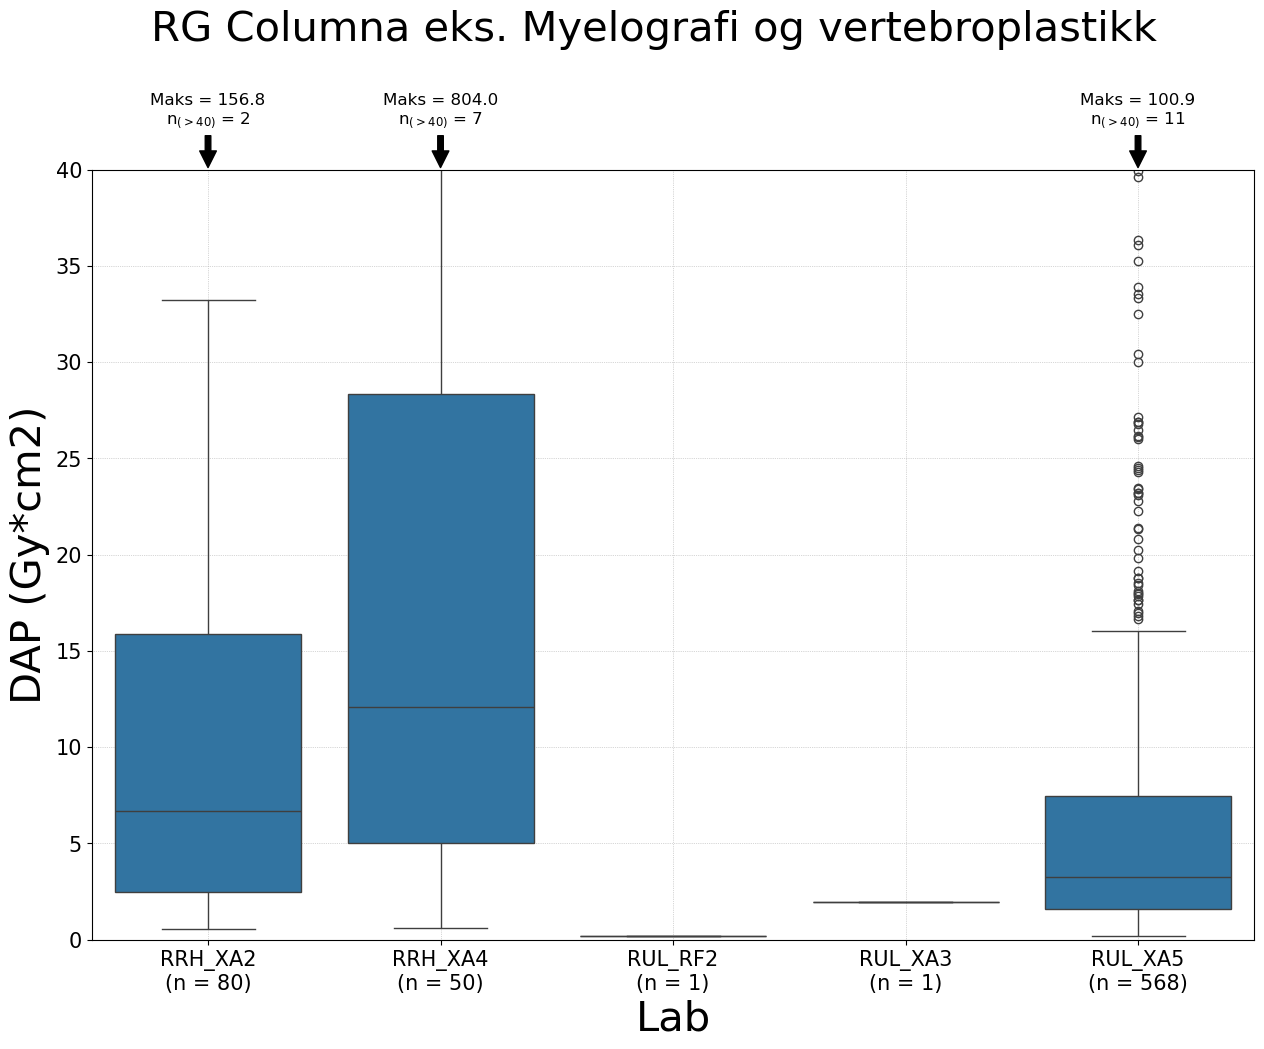

In [33]:
procedure = 'RG Columna eks. Myelografi og vertebroplastikk'
bh_plot.plot_representative_dose(data, procedure, 40, export)

Reporting doses for Cervical Nerverotsinjeksjon:


Alle: n =    0, DAP: Median - nan, 95% CI: [nan - nan] IQR [nan - nan], Range (nan - nan).


--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


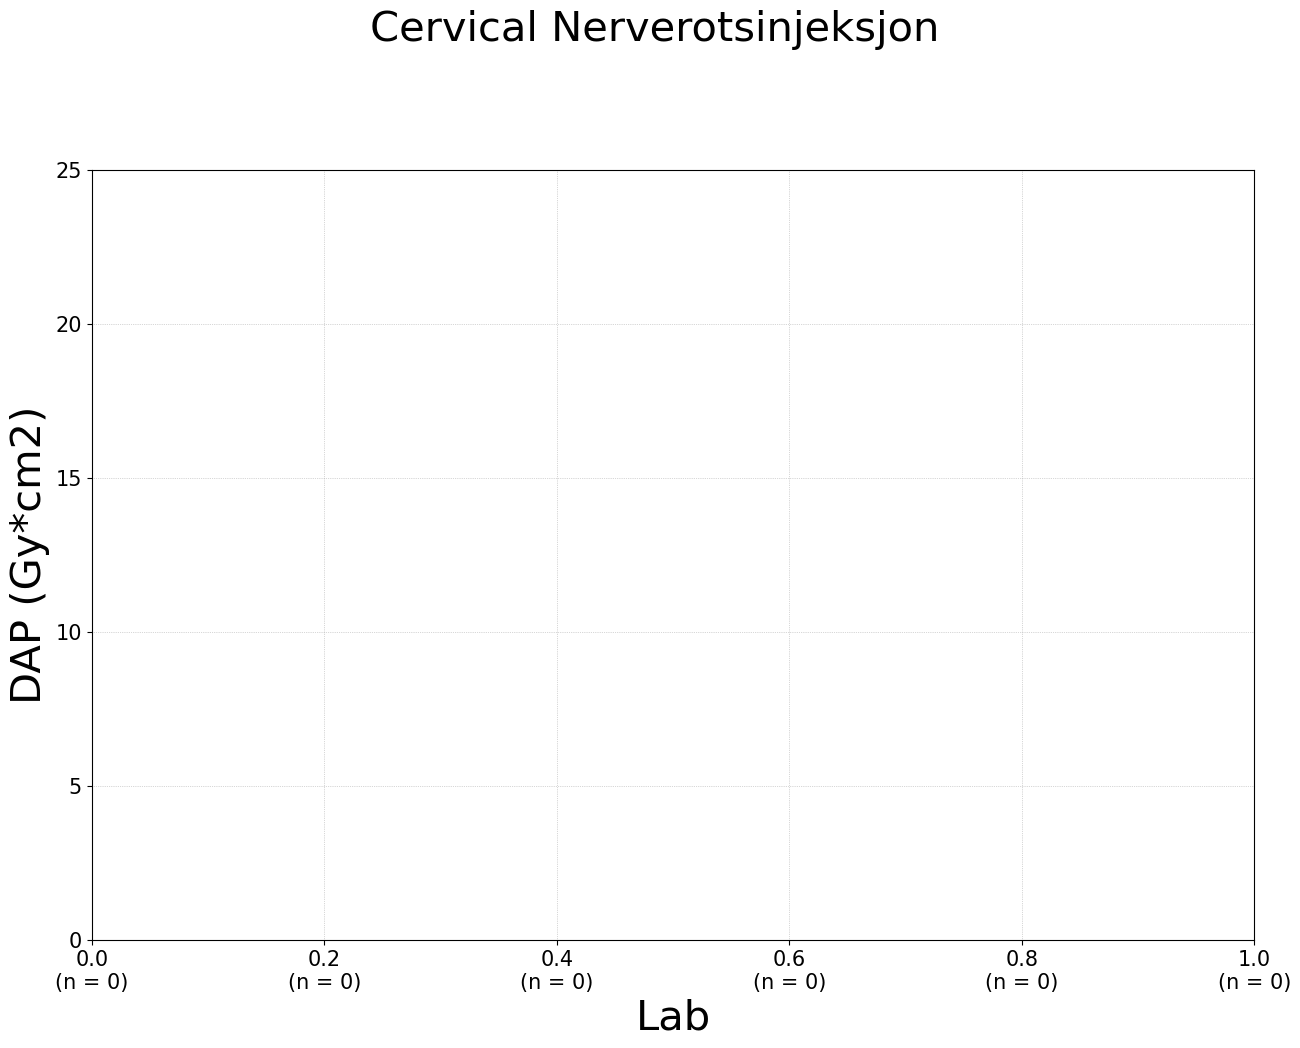

In [34]:
procedure = 'Cervical Nerverotsinjeksjon'
bh_plot.plot_representative_dose(data, procedure, 25, export)

Reporting doses for Cochlia:


Alle: n =   32, DAP: Median - 10.0, 95% CI: [7.95 - 14.65] IQR [6.7 - 21.5], Range (0.1 - 130.4).


IRH_XA7: n =   32, DAP: Median - 9.95 (Gy*cm2), 95% CI: [7.95 - 14.67] IQR [6.73 - 21.46], Range (0.11 - 130.42).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


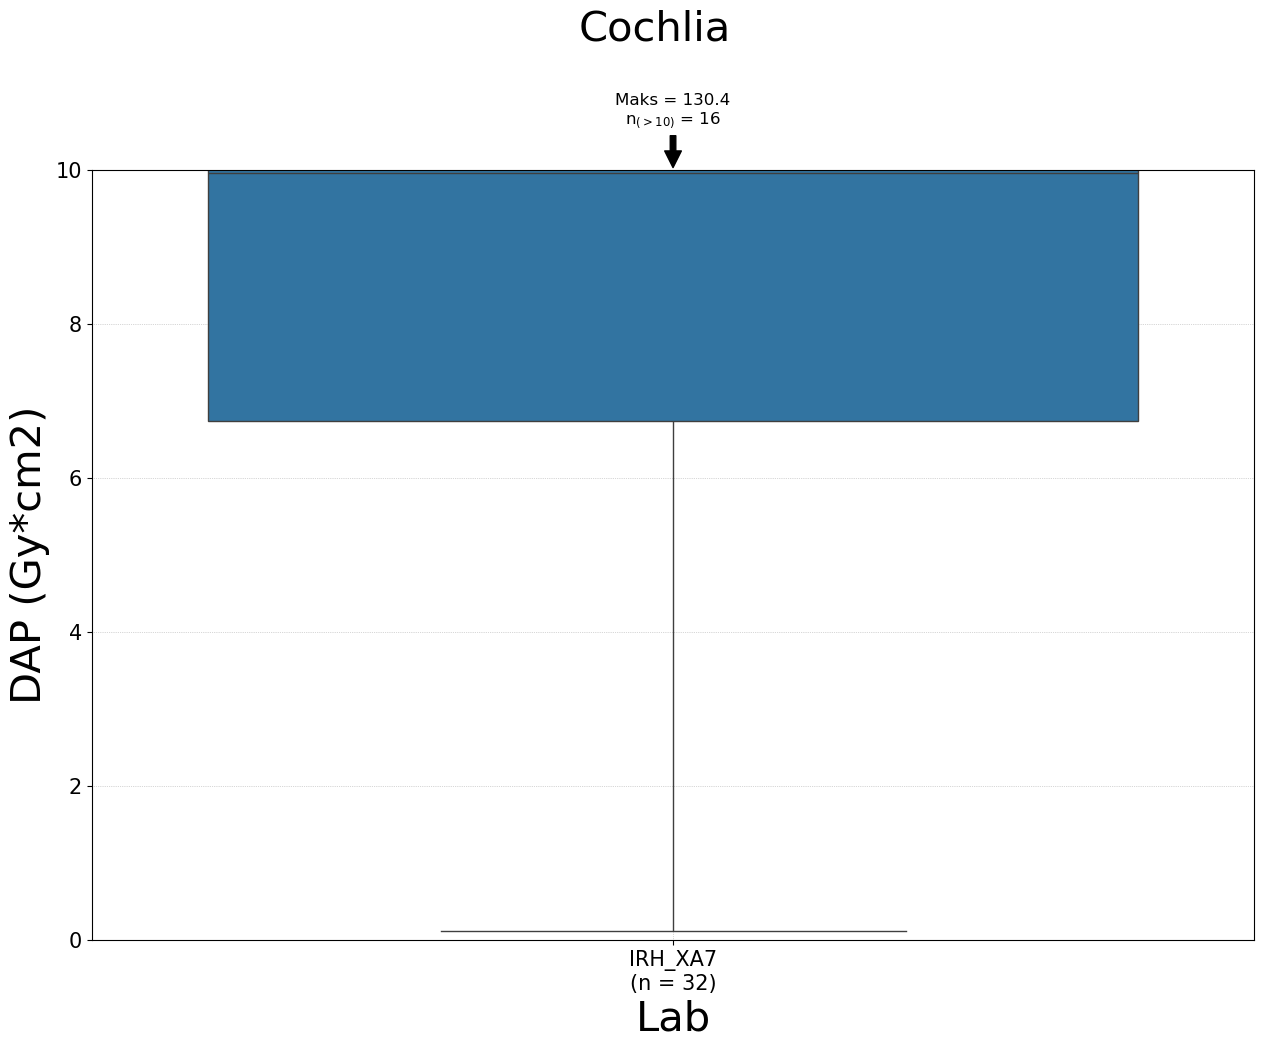

In [35]:
procedure = 'Cochlia'
bh_plot.plot_representative_dose(data, procedure, 10, export)

Reporting doses for Scoliose:


Alle: n =   17, DAP: Median - 34.8, 95% CI: [0.24 - 43.93] IQR [0.2 - 43.9], Range (0.0 - 126.7).


IRH_XA7: n =   17, DAP: Median - 34.78 (Gy*cm2), 95% CI: [0.24 - 43.93] IQR [0.24 - 43.93], Range (0.01 - 126.73).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


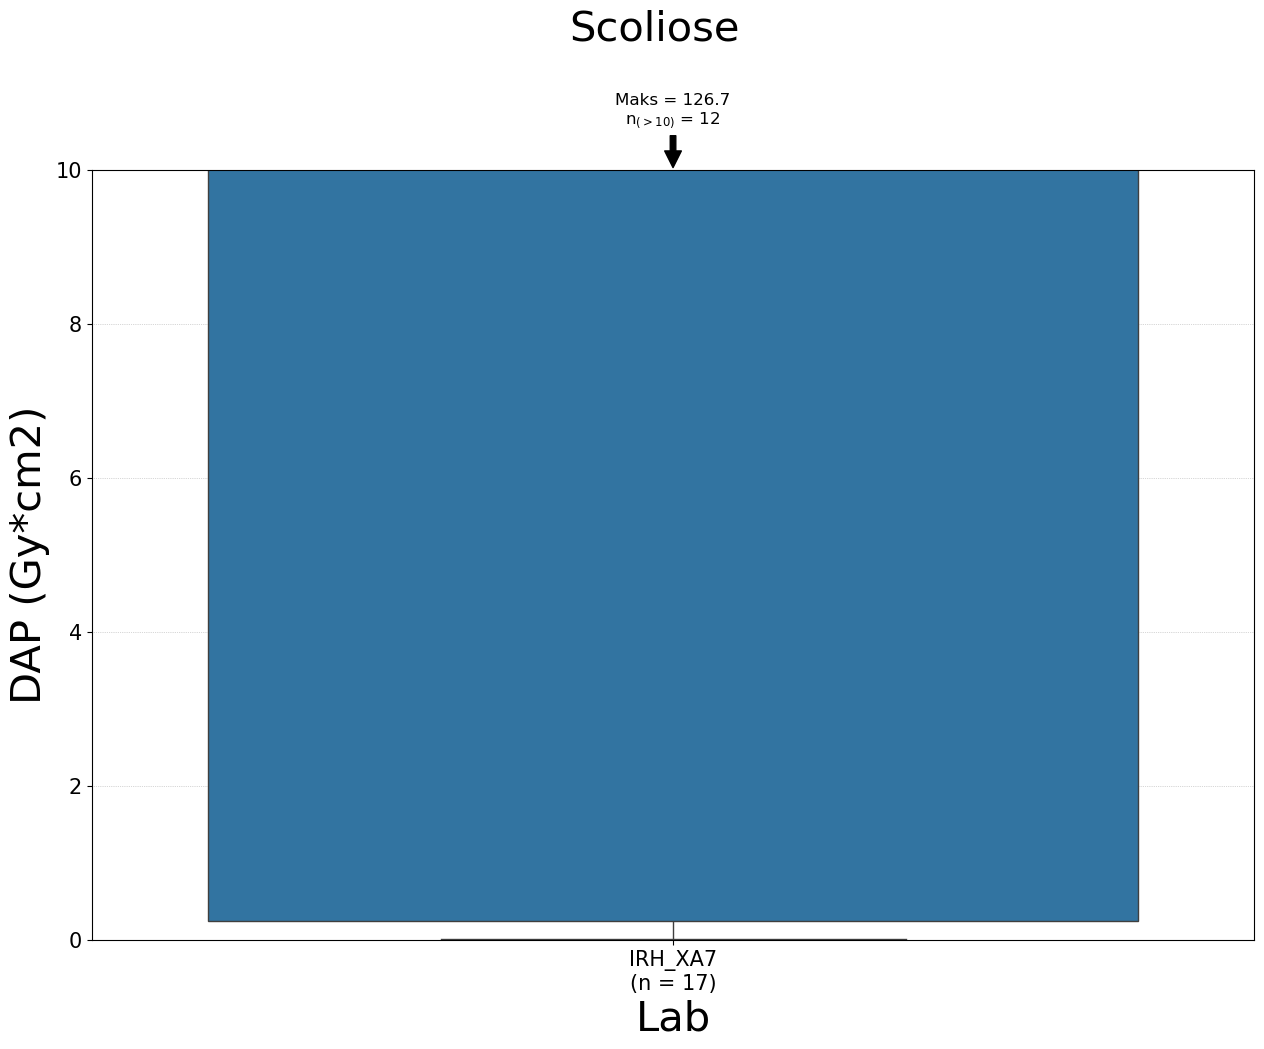

In [8]:
procedure = 'Scoliose'
bh_plot.plot_representative_dose(data, procedure, 10, export)

Reporting doses for Shuntveier/Shuntventil:


Alle: n =  256, DAP: Median - 0.1, 95% CI: [0.05 - 0.08] IQR [0.0 - 0.3], Range (0.0 - 24.5).


RRH_RF1: n =   80, DAP: Median - 0.02 (Gy*cm2), 95% CI: [0.01 - 0.04] IQR [0.01 - 0.07], Range (0.0 - 1.59).
RRH_RF2: n =  122, DAP: Median - 0.06 (Gy*cm2), 95% CI: [0.04 - 0.08] IQR [0.02 - 0.25], Range (0.0 - 1.38).
RUL_RF1: n =    6, DAP: Median - 0.09 (Gy*cm2), 95% CI: [0.05 - 0.2] IQR [0.06 - 0.16], Range (0.05 - 0.24).
RUL_RF2: n =    2, DAP: Median - 0.1 (Gy*cm2), 95% CI: [0.04 - 0.17] IQR [0.07 - 0.14], Range (0.04 - 0.17).
RUL_XA3: n =   12, DAP: Median - 1.1 (Gy*cm2), 95% CI: [0.41 - 2.32] IQR [0.42 - 2.18], Range (0.04 - 11.54).
RUL_XA5: n =   34, DAP: Median - 0.27 (Gy*cm2), 95% CI: [0.15 - 0.42] IQR [0.14 - 0.74], Range (0.03 - 24.48).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


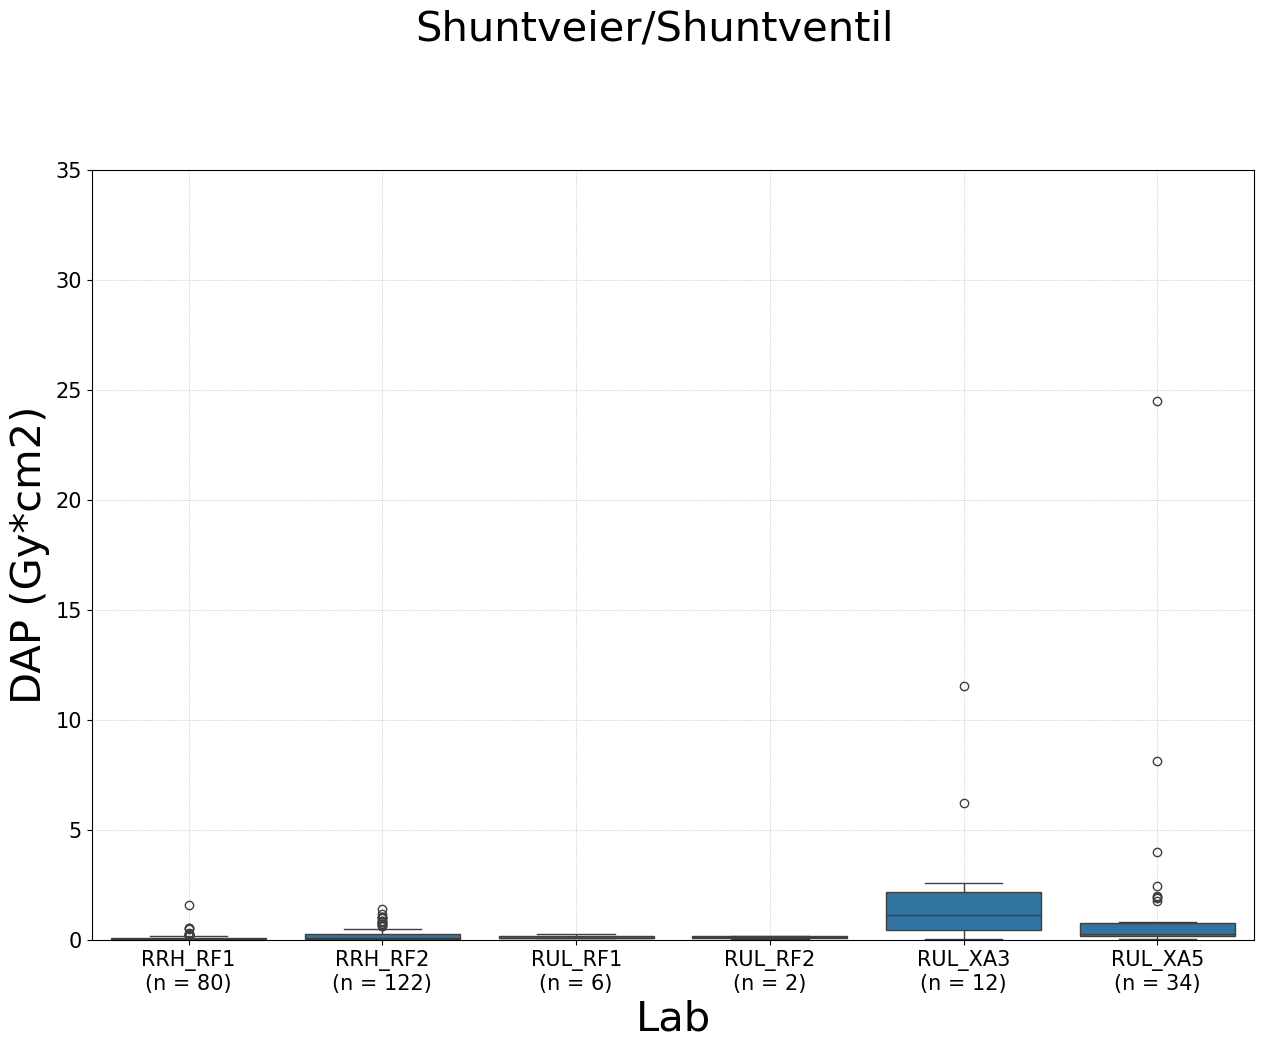

In [7]:
procedure = 'Shuntveier/Shuntventil'
bh_plot.plot_representative_dose(data, procedure, 35, export)

Reporting doses for Diafragmabevegelse:


Alle: n =   26, DAP: Median - 1.7, 95% CI: [1.46 - 2.46] IQR [1.3 - 3.0], Range (0.2 - 9.8).


RRH_RF2: n =   22, DAP: Median - 1.74 (Gy*cm2), 95% CI: [1.46 - 3.04] IQR [1.42 - 3.27], Range (0.69 - 9.79).
RUL_RF1: n =    4, DAP: Median - 1.39 (Gy*cm2), 95% CI: [0.24 - 2.37] IQR [0.69 - 2.05], Range (0.24 - 2.37).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


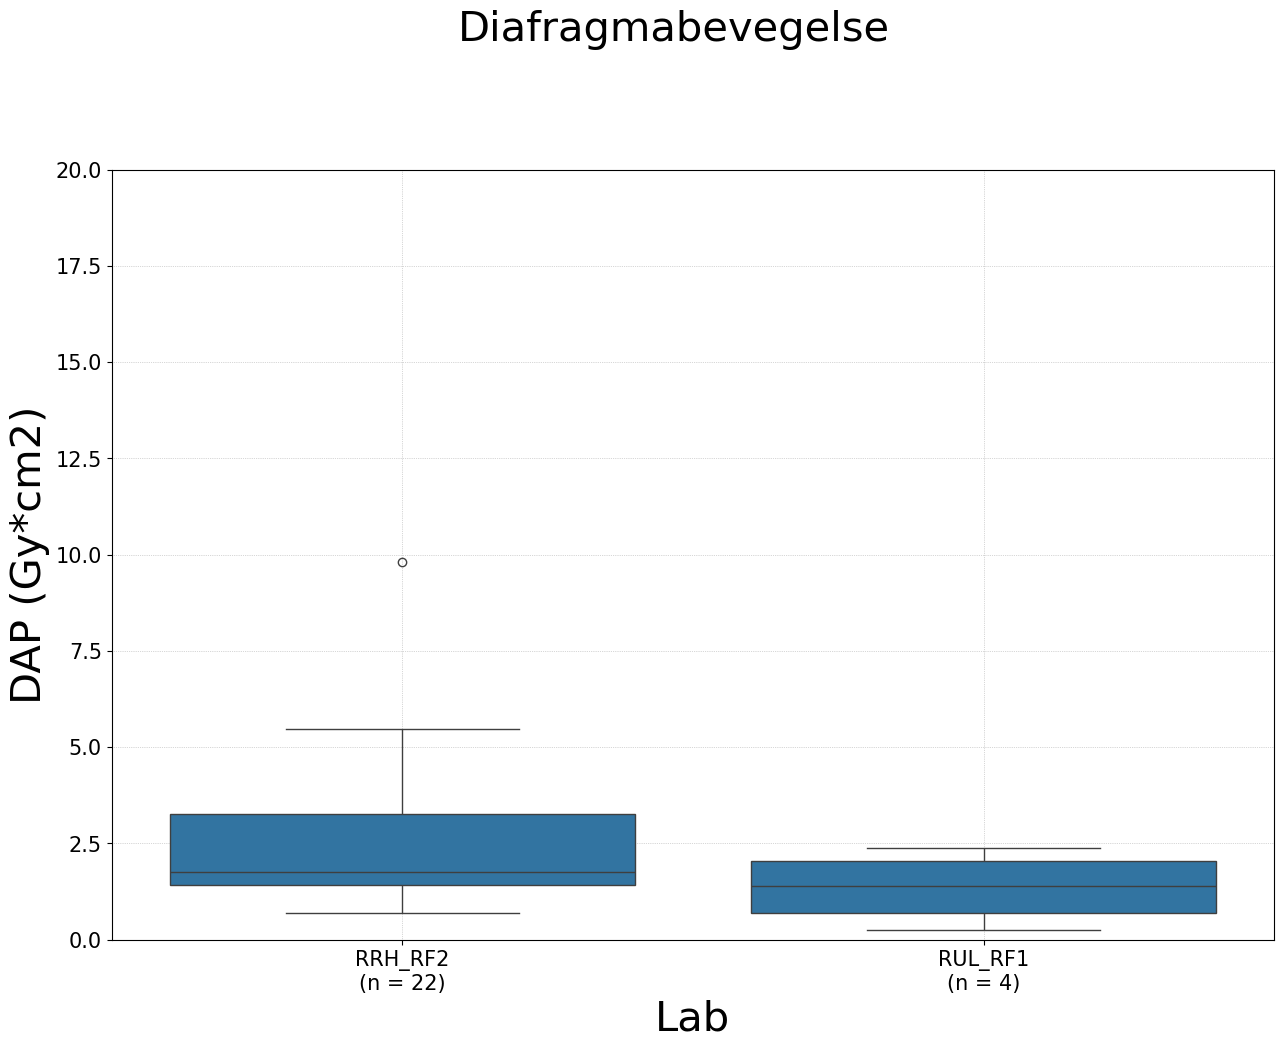

In [9]:
procedure = 'Diafragmabevegelse'
bh_plot.plot_representative_dose(data, procedure, 20, export)

In [ ]:
procedure = 'HSG'
bh_plot.plot_representative_dose(data, procedure, 20, export)

In [ ]:
procedure = 'RGV Cor Biopsi'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)

In [ ]:
procedure = 'RGV Cor Hø kat, måling av trykk og flow i lille kretsløp'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)

In [ ]:
procedure = 'RGV Cor Høyre kat. Arytmi'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)